In [ ]:
!pip install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 20.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=fb1ab359d1000351bde308093ff03eb0c3267bdcfd776b5c479006cb863b3ffd
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


In [ ]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keplergl
from keplergl import KeplerGl
from wordcloud import WordCloud
#allow colab to output maps
from google.colab import output
output.enable_custom_widget_manager()
pd.set_option('display.width', 180)

In [ ]:

#question: what are the most common traits between squirrels in central park, nyc?
#hypothesis: we hypothesize

class ColorNotFound(Exception):
  #raised when user tries to put in a color that is not present in the data frame
  pass
class Squirrels():
  '''
  METHODS TO CLEAN THE DATA
  '''
  def clean_data(self, df1, df2):
    '''
    -we want to drop duplicates, unwanted columns, and n/a values, this code cleans from 3,023 observations to 1817 observations
    -df2 is just a copy of df1 with less columns removed, will only be used to merge later on
    -.unique() by default is case sensitive, we have tested all unique values beforehand

    '''
    bool_mapping = {'TRUE': True, 'FALSE': False}
    #dataframe 1 processing - main dataframe
    df1.replace(bool_mapping)
    df1.drop_duplicates(keep ='first', inplace = True,subset=['Unique Squirrel ID'])
    df1.drop(df1[df1['Unique Squirrel ID'] =='32A-PM-1013-02'].index, inplace= True)
    df1.drop(['Specific Location', 'Other Activities', 'Other Interactions', 'Color notes', 'Combination of Primary and Highlight Color'], axis = 1, inplace = True)
    df1.dropna(axis = 0, how='any', inplace =True)
    df1.to_excel(('bool.xlsx'), index=False)
    #dataframe 2 processing - copy dataframe
    df2.replace(bool_mapping)
    df2.drop_duplicates(keep ='first', inplace = True, subset=['Unique Squirrel ID'])
    df2.drop(['Hectare', 'Hectare Squirrel Number','Combination of Primary and Highlight Color'], axis = 1, inplace = True)
    df2 = df2.replace(bool_mapping)
    return df1

  def get_info(self, df):
    #retreives basic information about the database and its attributes
    print("Names of all the columns: \n")
    print(df.columns)
    print("\nData types of all the columns: \n")
    print(df.dtypes)
    print("\nGeneral information about the dataframe: \n")
    print(df.info())

  def show_uniques(self, df):
    #retrieves unique values present in the dataframe columns, mainly just to check for if there are any outsanding values that may need to be removed
    print(squirrels_df['Shift'].unique())
    print(squirrels_df['Age'].unique())
    print(squirrels_df['Primary Fur Color'].unique())
    print(squirrels_df['Highlight Fur Color'].unique())
    print(squirrels_df['Location'].unique())
    print(squirrels_df['Above Ground Sighter Measurement'].unique())
  '''
  METHODS TO GET SQUIRREL LOCATION INFORMATION
  '''
  def location_pie_chart(self, df):
    #creates a pie chart showing percentage of squirrels seen above ground or on ground plane
    labels = ['Above Ground', 'Ground Plane']
    above_ground = (df['Location'] == 'Above Ground').sum()
    ground_plane = (df['Location'] == 'Ground Plane').sum()
    frequency = [above_ground, ground_plane]
    plt.pie(frequency, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('Squirrel Location by Frequency')
    plt.show()

  def squirrel_map(self,df):
    #gets a map of the location of all central park squirrels recorded using kepler gl
    squirrel_map = KeplerGl(height = 500)
    squirrel_map.add_data(df,'Squirrel Locations')
    return squirrel_map

  def scatter(self, df):
    #make a scatter plot of squirrel latitude and hectare
    df_sorted = df.sort_values(by='Y')
    x = df_sorted['Hectare'].astype(str)
    y = df_sorted['Y']
    plt.scatter(x, y)
    plt.xticks(ticks=['01I', '20F', '42A'], labels=['01I', '20F', '42A'])
    plt.xlabel('Hectare')
    plt.ylabel('Latitude')
    plt.title('Latitude vs. Hectare')
    plt.show()

  '''
  METHODS TO GET SQUIRREL APPEARANCE
  '''
  def age_pie_chart(self, df):
    #creates a pie chart showing percentage of squirrel ages
    labels = ['Adult', 'Juvenile']
    adult = (df['Age'] == 'Adult').sum()
    juvenile = (df['Age'] == 'Juvenile').sum()
    frequency = [adult, juvenile]
    plt.pie(frequency, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('Squirrel Age by Frequency')
    plt.show()

  def histogram(self, df):
    #method to create a historgram of squirrel color distribution. set Gray = 1, Cinnamon = 2, Black = 3
    df.loc[df['Primary Fur Color']  == 'Gray', 'Primary Fur Color'] = 1
    df.loc[df['Primary Fur Color']  == 'Cinnamon', 'Primary Fur Color'] = 2
    df.loc[df['Primary Fur Color']  == 'Black', 'Primary Fur Color'] = 3
    bin_edges = [.5, 1.5, 2.5, 3.5]
    plt.hist(df['Primary Fur Color'], bins = bin_edges, edgecolor= 'black')
    plt.title('Colors by Frequency')
    plt.xlabel('Colors')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.xticks([1,2,3],['Gray','CInnamon','Black'])
    plt.show

  def highlight_wordcloud(self, df):
    #method to create a word cloud, populating with squirrel fur highlight colors
    wordcloud_text = ' '.join(df['Highlight Fur Color'].unique())
    wordCloud = WordCloud(width =250, height = 250, background_color = 'white').generate(wordcloud_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.title('Highlight Fur Colors')
    plt.show

  '''
  METHODS TO GET SQUIRREL BEHAVIOR INFORMATION
  '''
  def behaviors_chart(self,df):
    labels = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging','Kuks','Quaas','Moans','Tail flags','Tail twitches','Approaches','Indifferent','Runs from']
    #get counts of boolean values for each feature so that it can be utilized in a bar chart
    running_false = (df['Running'] == False).sum()
    running_true = (df['Running'] == True).sum()
    chasing_false = (df['Chasing'] == False).sum()
    chasing_true = (df['Chasing'] == True).sum()
    climbing_false = (df['Climbing'] == False).sum()
    climbing_true = (df['Climbing'] == True).sum()
    eating_false = (df['Eating'] == False).sum()
    eating_true = (df['Eating'] == True).sum()
    foraging_false = (df['Foraging'] == False).sum()
    foraging_true = (df['Foraging'] == True).sum()
    kuks_false = (df['Kuks'] == False).sum()
    kuks_true = (df['Kuks'] == True).sum()
    quaas_false = (df['Quaas'] == False).sum()
    quaas_true = (df['Quaas'] == True).sum()
    moans_false = (df['Moans'] == False).sum()
    moans_true = (df['Moans'] == True).sum()
    flag_false = (df['Tail flags'] == False).sum()
    flag_true = (df['Tail flags'] == True).sum()
    twitch_false = (df['Tail twitches'] == False).sum()
    twitch_true = (df['Tail twitches'] == True).sum()
    approach_false = (df['Approaches'] == False).sum()
    approach_true = (df['Approaches'] == True).sum()
    indif_false = (df['Indifferent'] == False).sum()
    indif_true = (df['Indifferent'] == True).sum()
    runs_false = (df['Runs from'] == False).sum()
    runs_true = (df['Runs from'] == True).sum()
    #create the lists containing true and false behavior counts for each feature
    false_behaviors = [running_false,chasing_false, climbing_false,eating_false,foraging_false,kuks_false,quaas_false,moans_false,flag_false,twitch_false,approach_false,indif_false,runs_false]
    true_behaviors = [running_true,chasing_true, climbing_true,eating_true,foraging_true,kuks_true,quaas_true,moans_true,flag_true,twitch_true,approach_true,indif_true,runs_true]
    width= .3
    space_bars = 1
    x = np.arange(len(labels))
    fig, ax = plt.subplots()
    #format the graphs
    true_bars = ax.bar(x-width/2 -space_bars/2, true_behaviors,width, label = 'True')
    false_bars = ax.bar(x + width/2 - space_bars/2, false_behaviors, width, label = 'False')
    ax.set_xlabel('Behaviors')
    ax.set_ylabel('Frequencies')
    ax.set_title('Studied Behaviors')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right') #make all of the labels fit
    ax.legend()
    plt.tight_layout()
    plt.show()

  def pair_plot(self, df):
    chosen_columns = ['Age','Above Ground Sighter Measurement', 'Running','Chasing','Climbing','Eating','Foraging','Quaas','Moans','Tail flags','Tail twitches','Approaches','Indifferent','Runs from']
    sns.pairplot(df[chosen_columns])
    plt.show()

  def heat_map(self, df):
    #create a heat map of categorical variables from a pivot table
    #set am = 0 and pm = 1
    df_heatmap = df[['X','Y','Shift']]
    df_heatmap.loc[df_heatmap['Shift'] == 'AM'] = 0
    df_heatmap.loc[df_heatmap['Shift'] == 'PM'] = 1
    df_heatmap = df.pivot_table(values='Y', index = 'X', columns = 'Shift', aggfunc = np.mean)
    #npmatrix = np.matrix(df_heatmap)
    plt.figure(figsize=(10,25))
    sns.heatmap(df_heatmap, annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

  def contingency_table(self,df):
    #create a contingency table to see relationships between the behaviors and age of the squirrel
    contingency_table = pd.crosstab(df['Age'], columns=[df['Running'], df['Climbing'],df['Eating'],df['Foraging']], margins=True)
    pd.set_option('display.max_columns', None)
    #contingency_table_df = contingency_table.reset_index()
    print(contingency_table)

  '''
  MISCELLANEOUS METHODS
  '''
  def merge(self, df1, df2):
    #inner merge, only returns the rows for which the squirrel ID is present in both dataframes, merge squirrels_df and squirrels_df_copy
    joined = pd.merge(df1,df2, on= 'Unique Squirrel ID', how='inner', validate = 'one_to_one')
    return joined

  def at_pm(self, df):
    #retrieve all squirrels that were seen at night and display // example of slicing data of a particular column value
    return squirrels_df.loc[squirrels_df['Shift'] == 'PM']
  def at_am(self, df):
    #retrieve all squirrels that were seen during the day and display // example of slicing data of a particular column value
    return squirrels_df.loc[squirrels_df['Shift'] == 'AM']

  def arrange_and_extract_data(self, df, **kwargs):
    # Arrange the data based on the 'arrange' keyword arguments
    arranged_df = df[list(kwargs['arrange'].values())]

    # Extract the data based on the 'extract' keyword arguments
    extracted_df = df[list(kwargs['extract'].values())]

    return arranged_df, extracted_df

  def numpy_operations(self, df):
    #converts x and y coordinates in dataframe and uploads to numpy array / matrix (a 2d array is by default a matrix)
    x_values = df['X'].values
    y_values = df['Y'].values
    nparray = np.array([x_values,y_values]).T
    con = nparray[:,1] > 40.79
    print(nparray[con])

  def colors_count(self, df, *args):
    #retrieves the count of colors of squirrels, variable amount of arguments, throws exception if invalid input
      try:
        for arg in args:
          if arg not in df['Primary Fur Color'].unique():
            raise ColorNotFound
        for arg in args:
          print('Printing squirrels of color {}'.format(arg))
          count = (df['Primary Fur Color']== arg).sum()
          print('Count for {} = {}'.format(arg, count))
      except ColorNotFound:
        print('Please enter a color present in the dataframe, such as Gray, Black, or Cinnamon')


In [ ]:
#create our instance of the squirrel class and read the data into a pandas dataframe
squirrels_df = pd.read_csv('/content/squirrels.csv')
squirrels_df_copy = squirrels_df.copy()
squirrel = Squirrels()
squirrel.get_info(squirrels_df)
#perform methods on the instance
squirrel.clean_data(squirrels_df, squirrels_df_copy)
squirrel.get_info(squirrels_df)
#squirrel.show_uniques(squirrels_df)



Names of all the columns: 

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date', 'Hectare Squirrel Number', 'Age', 'Primary Fur Color', 'Highlight Fur Color',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location', 'Above Ground Sighter Measurement', 'Specific Location', 'Running', 'Chasing', 'Climbing',
       'Eating', 'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Other Interactions',
       'Lat/Long'],
      dtype='object')

Data types of all the columns: 

X                                             float64
Y                                             float64
Unique Squirrel ID                             object
Hectare                                        object
Shift                                          object
Date                                            int64
Hectare Squirrel Number                         int64
Age                             

# ** Squirrel Location**

---



In [ ]:
squirrel.squirrel_map(squirrels_df)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Squirrel Locations': {'index': [0, 1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 15, 19, 21, 22, 24, 25, 26…

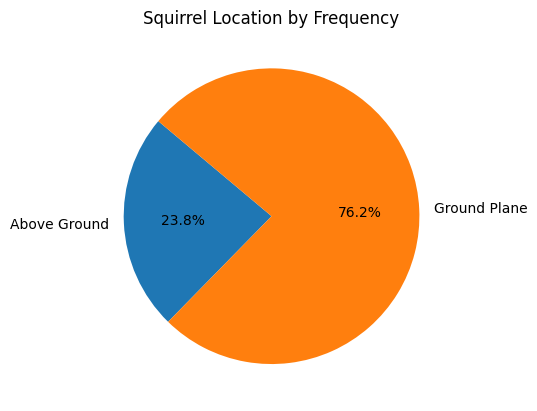

In [ ]:
squirrel.location_pie_chart(squirrels_df)

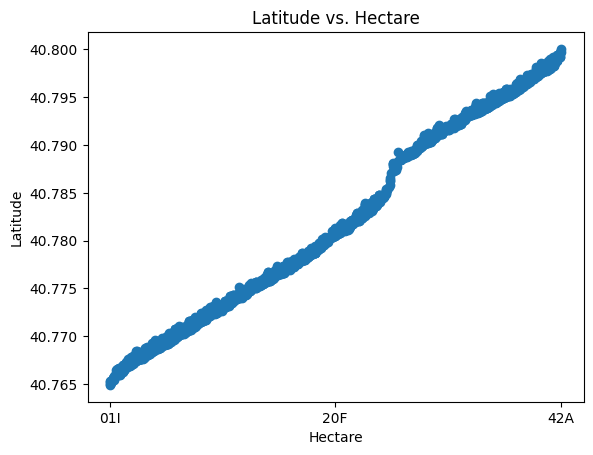

In [ ]:
squirrel.scatter(squirrels_df)
#strong positive correlation is shown between the two variables

## Squirrel Appearance

---



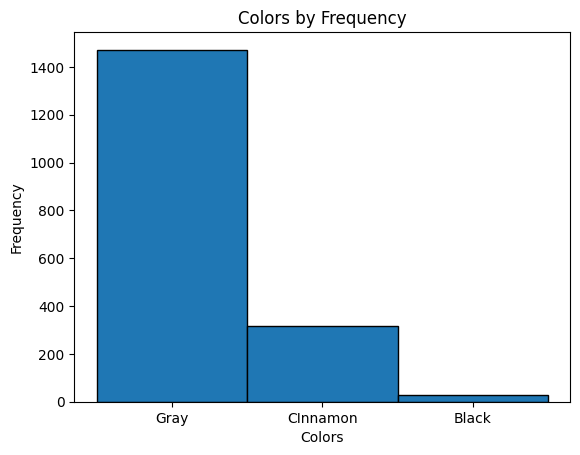

In [ ]:
#shows the colors of the squirrels by frequency in a histogram, right skewed distribution
squirrel.histogram(squirrels_df)



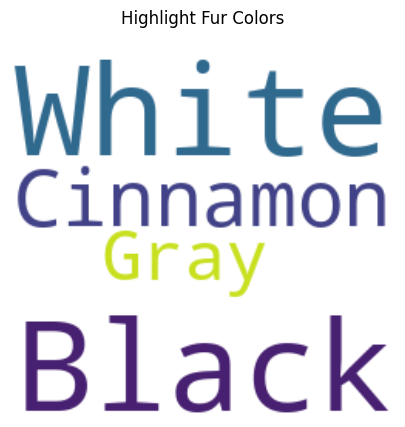

In [ ]:
squirrel.highlight_wordcloud(squirrels_df)

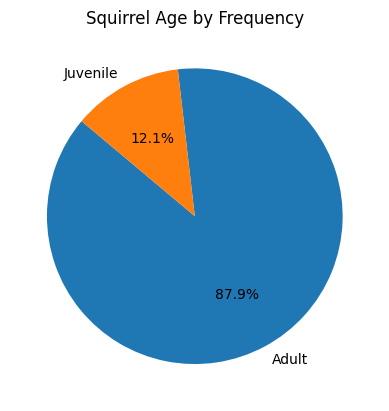

In [ ]:
squirrel.age_pie_chart(squirrels_df)

### Squirrel Behaviors

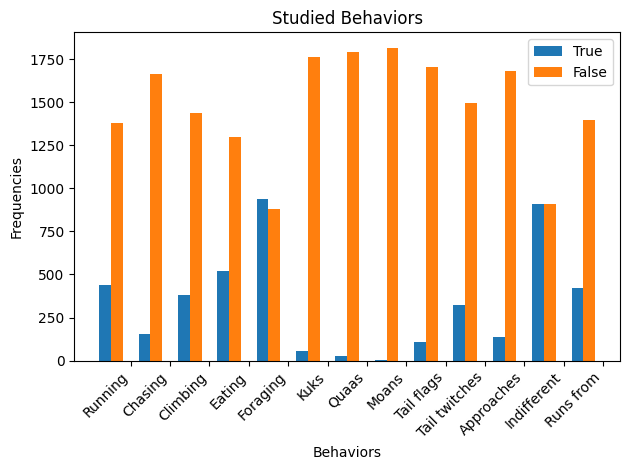

In [ ]:
#shows the frequency of observed squirrel behaviors
squirrel.behaviors_chart(squirrels_df)

In [ ]:
squirrel.contingency_table(squirrels_df)






Running  False                                        True                                         All
Climbing False                  True                 False                  True                      
Eating   False       True      False       True      False       True      False       True           
Foraging False True False True False True False True False True False True False True False True      
Age                                                                                                   
Adult      136  493   153  179   166   35    28   22   184   77    23   31    47   13     6    5  1598
Juvenile    24   48    36   14    31    5     6    5    27    5     4    5     6    1     2    0   219
All        160  541   189  193   197   40    34   27   211   82    27   36    53   14     8    5  1817


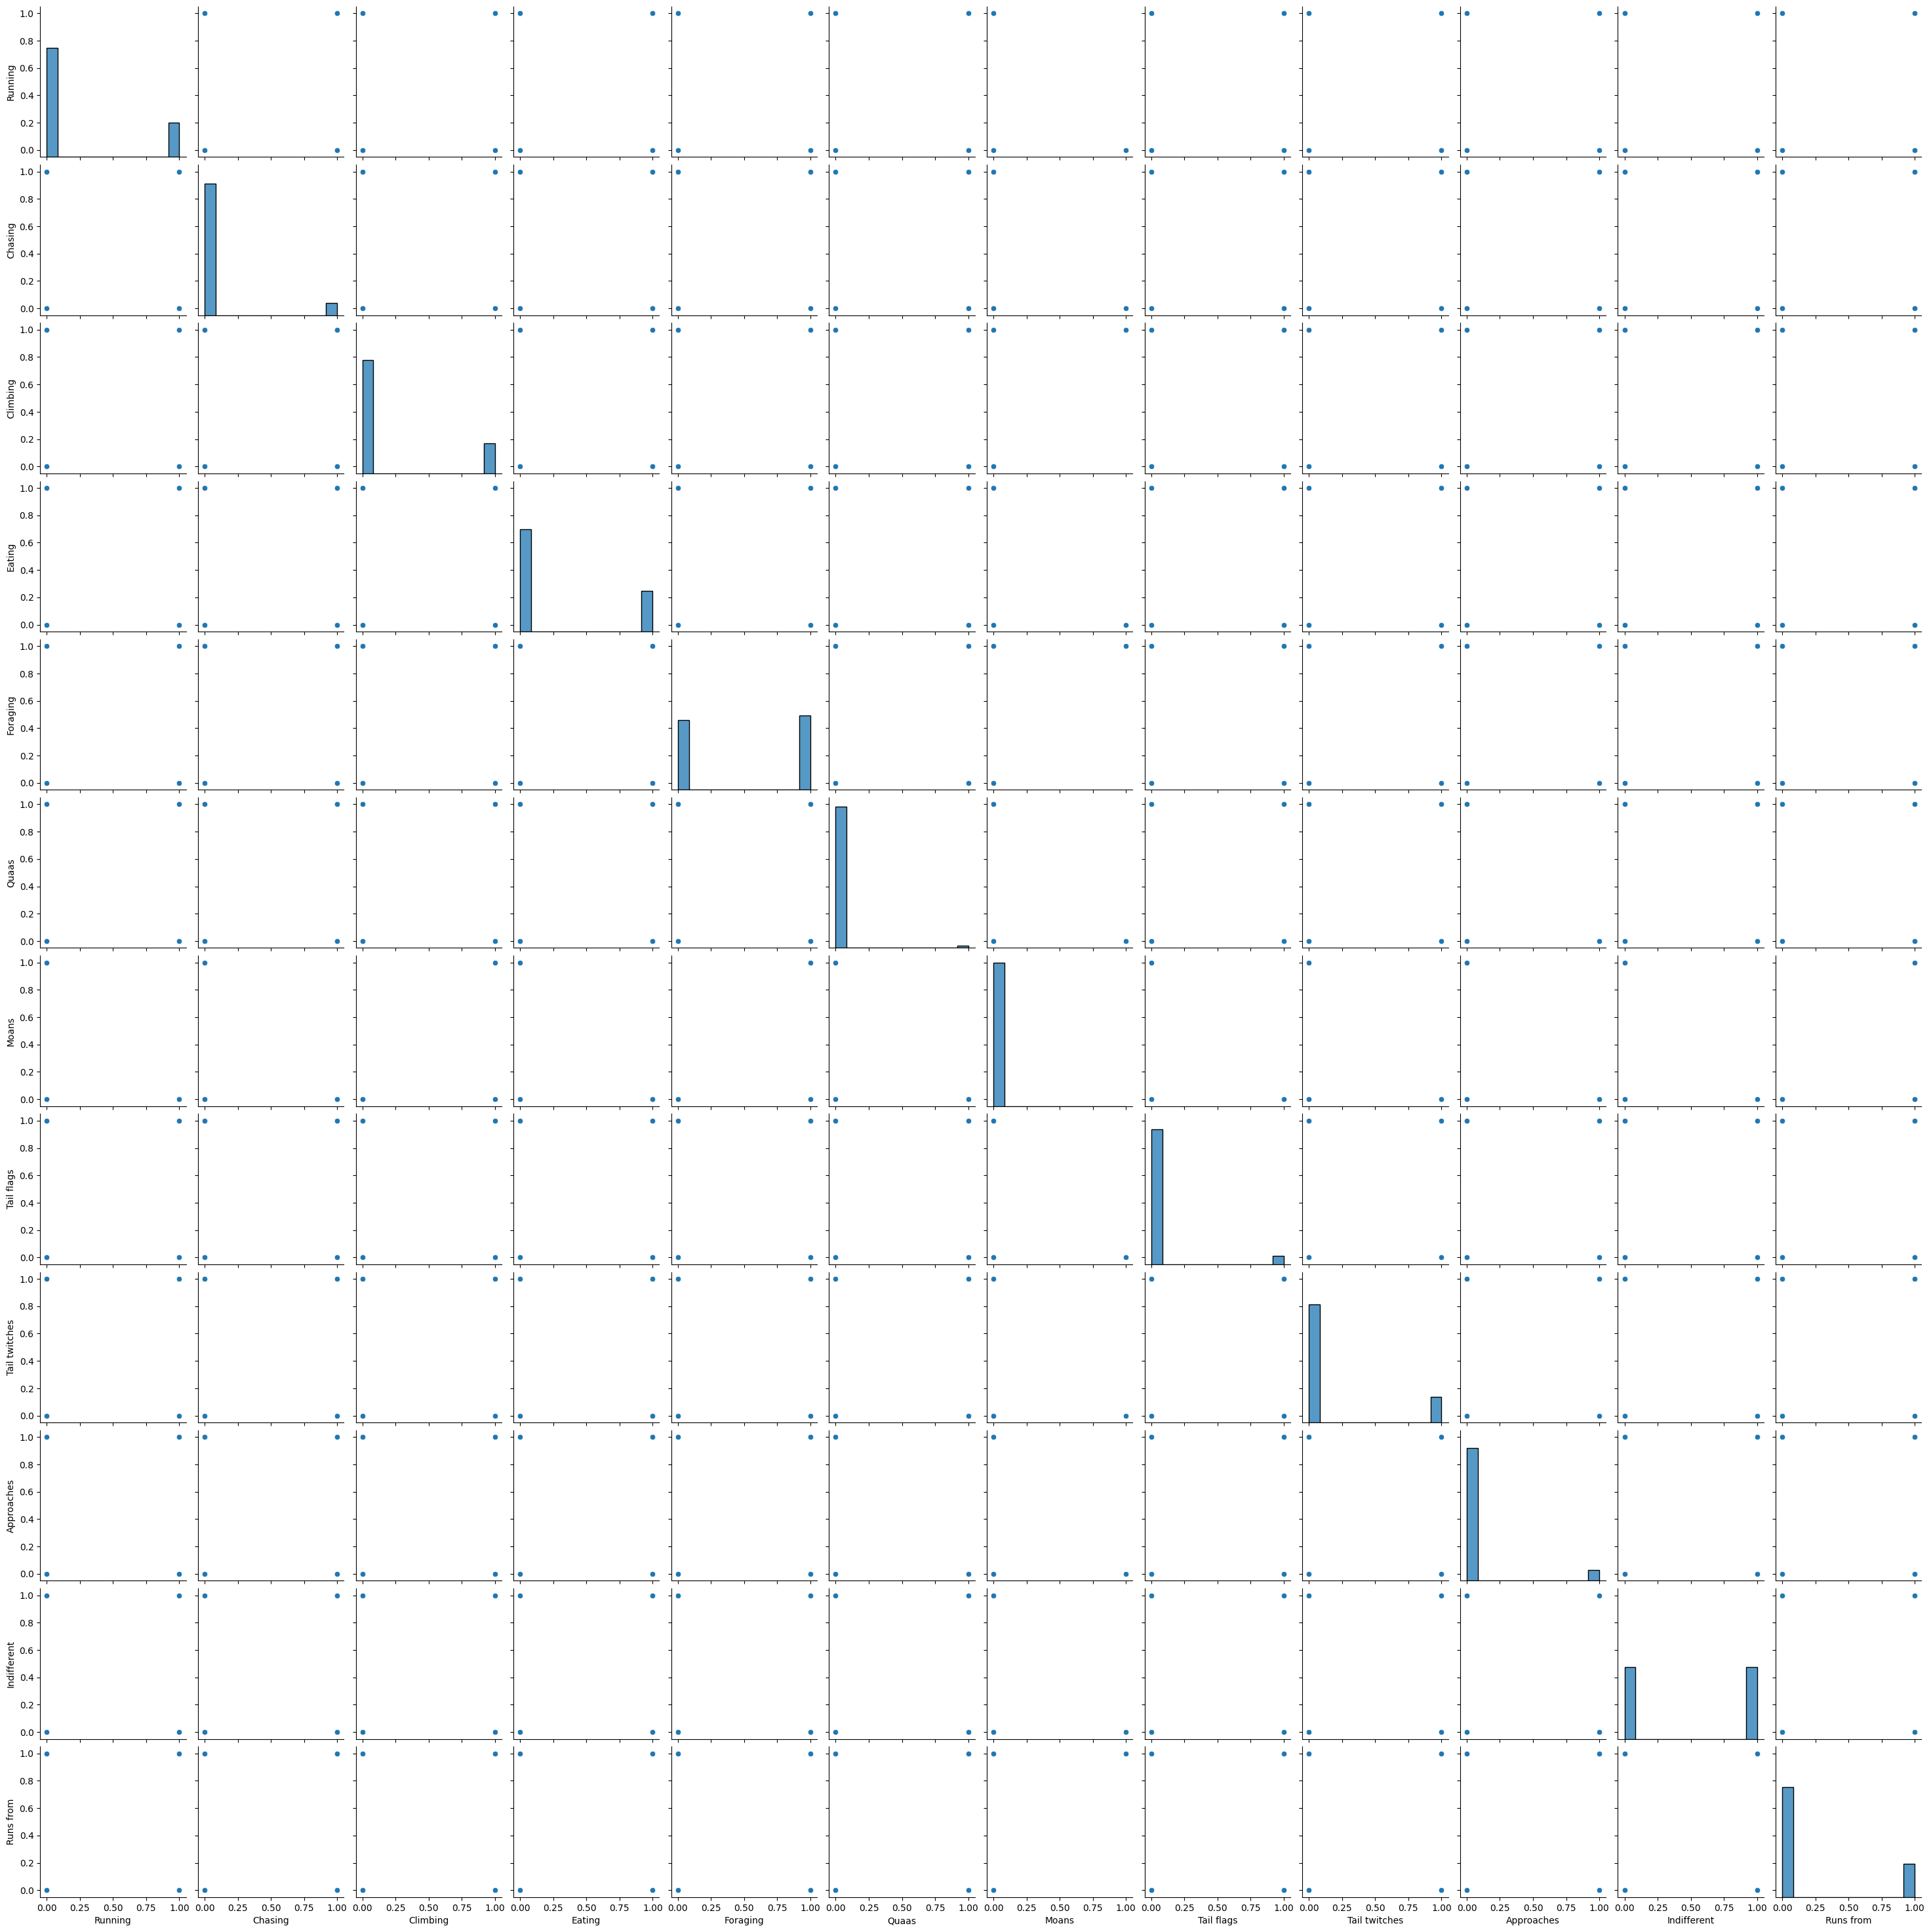

In [ ]:
#because this is all categorical data, not ideal for seeing the relationship, thus we created the contingency table above
squirrel.pair_plot(squirrels_df)

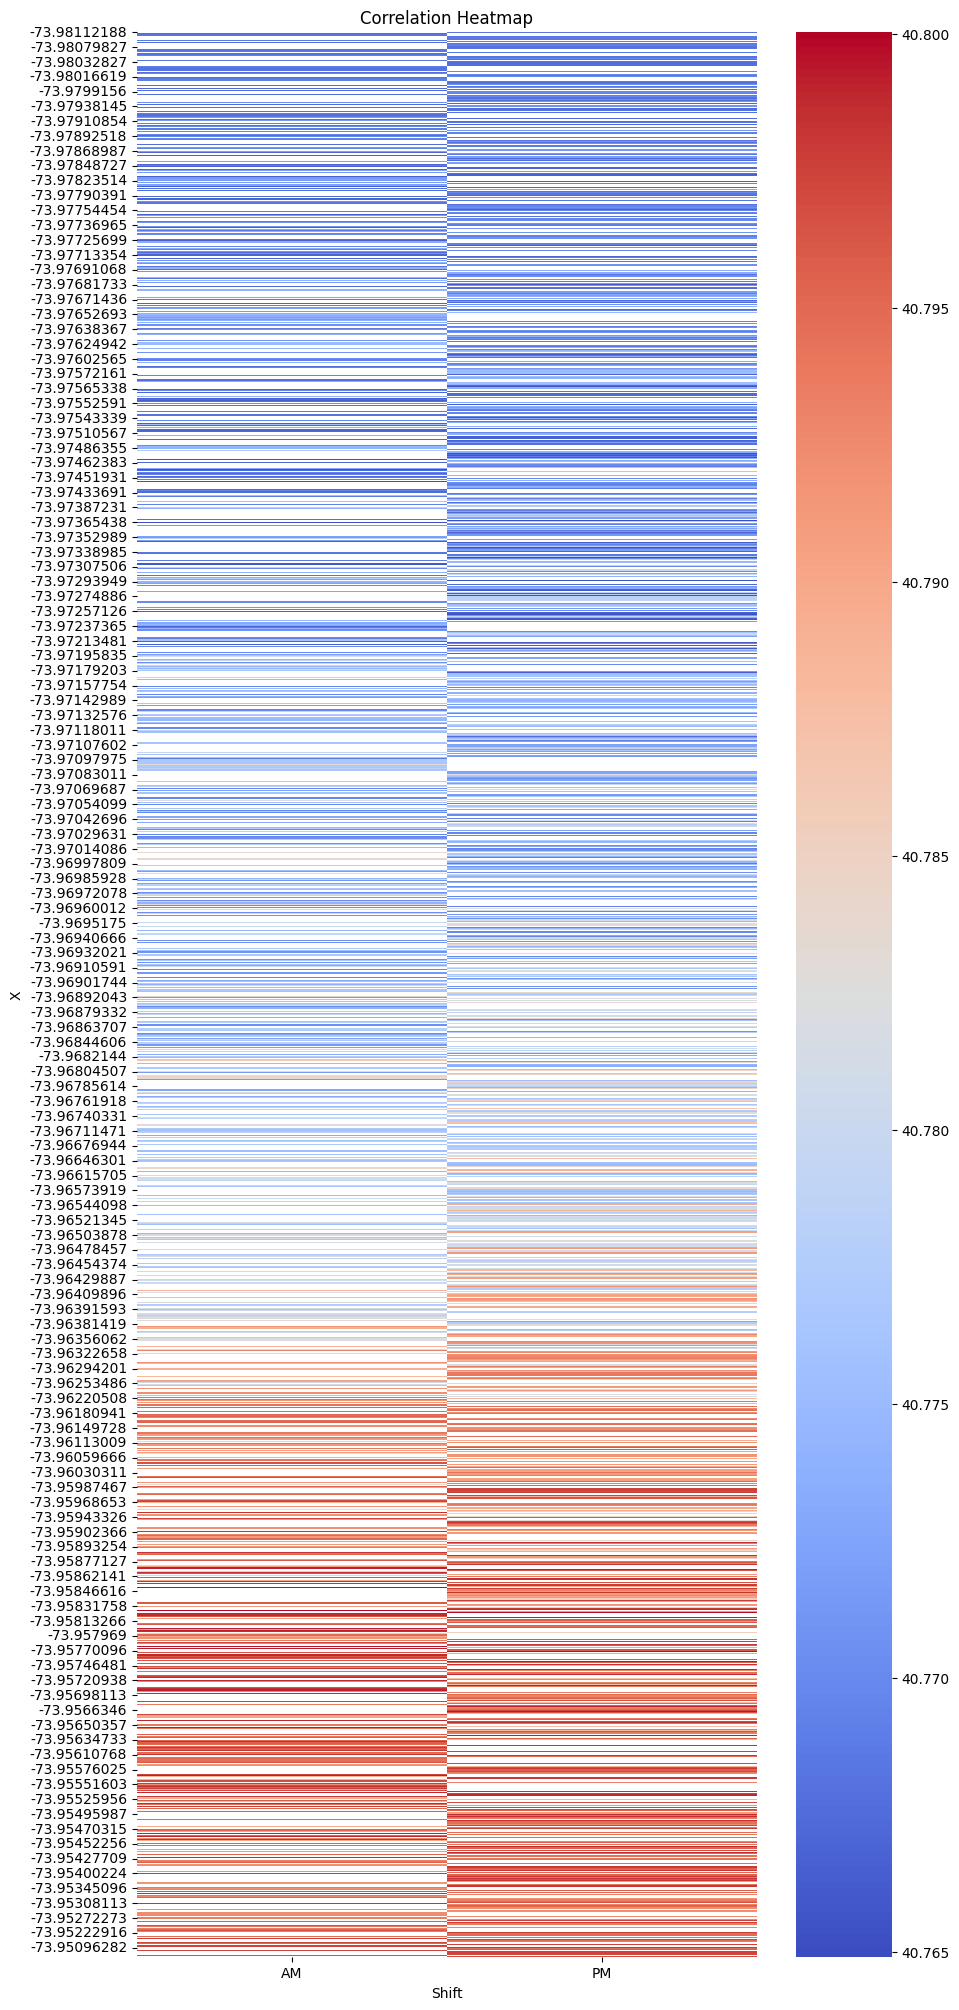

In [ ]:
squirrel.heat_map(squirrels_df)

In [ ]:
squirrel.squirrel_map(squirrels_df[squirrels_df['Shift']=='AM'])

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Squirrel Locations': {'index': [1, 6, 9, 15, 20, 24, 26, 32, 33, 34, 39, 41, 42, 44, 49, 50, 5…

In [ ]:
squirrel.squirrel_map(squirrels_df[squirrels_df['Shift']=='PM'])

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Squirrel Locations': {'index': [3, 4, 10, 11, 18, 21, 22, 30, 35, 40, 43, 45, 48, 52, 58, 60, …

In [ ]:
squirrel.merge(squirrels_df,squirrels_df_copy)


,X_x,Y_x,Unique Squirrel ID,Hectare,Shift_x,Date_x,Hectare Squirrel Number,Age_x,Primary Fur Color_x,Highlight Fur Color_x,Location_x,Above Ground Sighter Measurement_x,Running_x,Chasing_x,Climbing_x,Eating_x,Foraging_x,Kuks_x,Quaas_x,Moans_x,Tail flags_x,Tail twitches_x,Approaches_x,Indifferent_x,Runs from_x,Lat/Long_x,X_y,Y_y,Shift_y,Date_y,Age_y,Primary Fur Color_y,Highlight Fur Color_y,Color notes,Location_y,Above Ground Sighter Measurement_y,Specific Location,Running_y,Chasing_y,Climbing_y,Eating_y,Foraging_y,Other Activities,Kuks_y,Quaas_y,Moans_y,Tail flags_y,Tail twitches_y,Approaches_y,Indifferent_y,Runs from_y,Other Interactions,Lat/Long_y
0,-73.973687,40.764911,1I-PM-1012-02,01I,PM,10122018,2,Juvenile,1,"Black, Cinnamon, White",Above Ground,1,False,False,True,False,False,True,False,False,False,False,False,False,True,POINT (-73.9736873018042 40.7649106677138),-73.973687,40.764911,PM,10122018,Juvenile,Gray,"Black, Cinnamon, White","Gray, Black, & Cinnamon selected as Primary. G...",Above Ground,1,tree,False,False,True,False,False,NaN,True,False,False,False,False,False,False,True,NaN,POINT (-73.9736873018042 40.7649106677138)
1,-73.973322,40.764998,1I-PM-1012-01,01I,PM,10122018,1,Juvenile,1,"Black, Cinnamon, White",Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,True,False,False,True,POINT (-73.9733222531339 40.7649975371546),-73.973322,40.764998,PM,10122018,Juvenile,Gray,"Black, Cinnamon, White","Gray, Black, & Cinnamon selected as Primary. G...",Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,True,False,False,True,NaN,POINT (-73.9733222531339 40.7649975371546)
2,-73.973654,40.765144,1H-AM-1012-02,01H,AM,10122018,2,Adult,1,"Cinnamon, White",Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-73.9736543790582 40.7651444188432),-73.973654,40.765144,AM,10122018,Adult,Gray,"Cinnamon, White",NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9736543790582 40.7651444188432)
3,-73.974496,40.765259,1H-AM-1012-01,01H,AM,10122018,1,Adult,1,"Cinnamon, White",Ground Plane,FALSE,False,False,False,False,True,False,False,False,False,False,True,False,True,POINT (-73.9744960829844 40.7652585501959),-73.974496,40.765259,AM,10122018,Adult,Gray,"Cinnamon, White",NaN,Ground Plane,FALSE,NaN,False,False,False,False,True,NaN,False,False,False,False,False,True,False,True,first approaches then runs from - he was less ...,POINT (-73.9744960829844 40.7652585501959)
4,-73.972963,40.765260,1I-PM-1012-04,01I,PM,10122018,4,Juvenile,2,White,Above Ground,2,False,False,True,False,False,False,False,False,False,True,False,False,True,POINT (-73.97296259363 40.7652601851275),-73.972963,40.765260,PM,10122018,Juvenile,Cinnamon,White,Cinnamon & White selected as Primary. Cinnamon...,Above Ground,2,on ledge,False,False,True,False,False,NaN,False,False,False,False,True,False,False,True,NaN,POINT (-73.97296259363 40.7652601851275)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,-73.957776,40.799385,41B-AM-1010-10,41B,AM,10102018,10,Adult,2,White,Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-73.9577758125518 40.799384716477),-73.957776,40.799385,AM,10102018,Adult,Cinnamon,White,NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9577758125518 40.799384716477)
1813,-73.958494,40.799501,41A-AM-1013-01,41A,AM,10132018,1,Adult,1,Cinnamon,Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,False,False,True,False,POINT (-73.958494212554 40.7995008636057),-73.958494,40.799501,AM,10132018,Adult,Gray,Cinnamon,NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,ran across a pa

In [ ]:
#slice part of the data and display
squirrels_df[['Unique Squirrel ID', 'Primary Fur Color']]
#retrieve all squirrels that were seen at night and during the day
squirrel.at_am(squirrels_df)


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Location,Above Ground Sighter Measurement,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
1,-73.958264,40.800046,42A-AM-1019-01,42A,AM,10192018,1,Juvenile,1,White,Ground Plane,FALSE,False,False,False,False,True,False,False,False,False,True,False,True,False,POINT (-73.95826439540551 40.8000460061272)
6,-73.958494,40.799501,41A-AM-1013-01,41A,AM,10132018,1,Adult,1,Cinnamon,Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,False,False,True,False,POINT (-73.958494212554 40.7995008636057)
9,-73.957776,40.799385,41B-AM-1010-10,41B,AM,10102018,10,Adult,2,White,Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,False,False,False,False,POINT (-73.9577758125518 40.799384716477)
15,-73.956478,40.799307,42C-AM-1007-01,42C,AM,10072018,1,Adult,1,Cinnamon,Ground Plane,FALSE,False,False,False,False,False,False,False,False,False,False,False,False,True,POINT (-73.9564777440695 40.7993068355401)
20,-73.957730,40.799225,41B-AM-1010-08,41B,AM,10102018,8,Adult,2,"Gray, White",Above Ground,20,False,False,True,True,False,False,False,False,False,False,True,False,False,POINT (-73.9577297187155 40.799225295679)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,-73.973150,40.765996,2H-AM-1006-02,02H,AM,10062018,2,Adult,1,"Cinnamon, White",Ground Plane,FALSE,False,True,True,False,False,False,False,False,False,False,True,False,False,POINT (-73.9731498064872 40.7659963196581)
3009,-73.974692,40.765523,1G-AM-1006-02,01G,AM,10062018,2,Juvenile,1,White,Above Ground,30,False,False,True,False,True,False,False,False,False,True,False,True,False,POINT (-73.9746918762076 40.7655231883678)
3010,-73.974591,40.765519,1G-AM-1006-03,01G,AM,10062018,3,Adult,3,Cinnamon,Ground Plane,FALSE,False,True,False,False,True,False,False,False,False,False,True,False,False,POINT (-73.9745908987975 40.7655191512308)
3018,-73.974496,40.765259,1H-AM-1012-01,01H,AM,10122018,1,Adult,1,"Cinnamon, White",Ground Plane,FALSE,False,False,False,False,True,False,False,False,False,False,True,False,True,POINT (-73.9744960829844 40.7652585501959)


In [ ]:
squirrel.at_pm(squirrels_df)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Location,Above Ground Sighter Measurement,Running,Chasing,Climbing,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
3,-73.957697,40.799758,42A-PM-1014-01,42A,PM,10142018,1,Adult,1,Cinnamon,Ground Plane,FALSE,True,False,False,False,True,False,False,False,False,False,False,False,False,POINT (-73.957697363244 40.7997576909042)
4,-73.958252,40.799690,41A-PM-1007-05,41A,PM,10072018,5,Adult,1,"Cinnamon, White",Ground Plane,FALSE,True,False,True,False,False,False,False,False,False,False,False,False,True,POINT (-73.9582523503306 40.7996897499473)
10,-73.956630,40.799369,42C-PM-1013-06,42C,PM,10132018,6,Adult,1,Cinnamon,Ground Plane,FALSE,False,False,True,True,False,False,False,False,False,False,False,True,True,POINT (-73.9566300789162 40.7993692120774)
11,-73.957599,40.799368,41B-PM-1014-01,41B,PM,10142018,1,Adult,1,White,Above Ground,25,False,False,True,False,False,False,False,False,False,False,False,False,True,POINT (-73.9575986161364 40.799368134968)
18,-73.957123,40.799246,41B-PM-1014-04,41B,PM,10142018,4,Adult,1,Cinnamon,Above Ground,40,False,False,True,False,False,False,False,False,False,False,False,False,False,POINT (-73.9571233640232 40.7992458980266)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,-73.973463,40.765310,1H-PM-1013-02,01H,PM,10132018,2,Adult,2,Gray,Ground Plane,FALSE,False,False,False,True,True,False,False,False,False,False,False,True,False,POINT (-73.9734630412566 40.7653097139415)
3016,-73.972815,40.765295,1I-PM-1012-03,01I,PM,10122018,3,Adult,1,"Black, Cinnamon, White",Ground Plane,FALSE,False,False,False,True,False,False,False,False,True,False,False,False,True,POINT (-73.97281464823851 40.765295171474506)
3017,-73.972963,40.765260,1I-PM-1012-04,01I,PM,10122018,4,Juvenile,2,White,Above Ground,2,False,False,True,False,False,False,False,False,False,True,False,False,True,POINT (-73.97296259363 40.7652601851275)
3021,-73.973322,40.764998,1I-PM-1012-01,01I,PM,10122018,1,Juvenile,1,"Black, Cinnamon, White",Ground Plane,FALSE,True,False,False,False,False,False,False,False,False,True,False,False,True,POINT (-73.9733222531339 40.7649975371546)


In [ ]:
arrange_columns = {'c1': 'X', 'c2': 'Y', 'c3':'Unique Squirrel ID', 'c4':'Hectare', 'c5':'Shift', 'c6':'Date', 'c7': 'Hectare Squirrel Number', 'c8':'Age','c9':'Primary Fur Color','c10':'Highlight Fur Color','c11':'Location','c12':'Above Ground Sighter Measurement','c13':'Running','c14':'Chasing','c15':'Climbing','c16':'Eating','c17':'Foraging','c18':'Kuks','c19':'Quaas','c20':'Moans','c21':'Tail flags','c22':'Tail twitches','c23':'Approaches', 'c24':'Indifferent','c25':'Runs from','c26':'Lat/Long'}
#extraction
extract_columns = {'a': 'Date', 'b': 'Hectare'}

arranged_data, extracted_data = squirrel.arrange_and_extract_data(squirrels_df, arrange=arrange_columns, extract=extract_columns)

print("Arranged Data:")
print(arranged_data.head())

print("\nExtracted Data:")
print(extracted_data.head())



Arranged Data:
           X          Y Unique Squirrel ID Hectare Shift      Date  Hectare Squirrel Number       Age Primary Fur Color Highlight Fur Color      Location  \
1 -73.958264  40.800046     42A-AM-1019-01     42A    AM  10192018                        1  Juvenile                 1               White  Ground Plane   
3 -73.957697  40.799758     42A-PM-1014-01     42A    PM  10142018                        1     Adult                 1            Cinnamon  Ground Plane   
4 -73.958252  40.799690     41A-PM-1007-05     41A    PM  10072018                        5     Adult                 1     Cinnamon, White  Ground Plane   
6 -73.958494  40.799501     41A-AM-1013-01     41A    AM  10132018                        1     Adult                 1            Cinnamon  Ground Plane   
9 -73.957776  40.799385     41B-AM-1010-10     41B    AM  10102018                       10     Adult                 2               White  Ground Plane   

  Above Ground Sighter Measurement  Runnin

In [ ]:
squirrel.numpy_operations(squirrels_df)

[[-73.9582644   40.80004601]
 [-73.95769736  40.79975769]
 [-73.95825235  40.79968975]
 ...
 [-73.96396351  40.79003376]
 [-73.95657389  40.7900161 ]
 [-73.96032683  40.79001545]]


In [ ]:
#testing *args
squirrel.colors_count(squirrels_df, 'Gray', 'Black')

Please enter a color present in the dataframe, such as Gray, Black, or Cinnamon


In [ ]:
#this code will throw the exception
squirrel.colors_count(squirrels_df, 'Gray', 'Purple')

Please enter a color present in the dataframe, such as Gray, Black, or Cinnamon
